In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr

In [3]:
data = pd.read_csv('Deduplicated_Artists_and_Albums_Dataset.csv')

# Data cleaning 
- Drop duplicates

In [4]:
data.drop_duplicates(inplace=True)

- Remove the unwanted variables: 

In [5]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [6]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,pagadoff,5,135860,False,0.784,0.657,11,-7.591,0,0.3480,0.332,0.00362,0.131,0.501,84.997,4,study
1,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,strolling,41,138875,False,0.857,0.381,2,-12.755,1,0.1920,0.666,0.01910,0.126,0.329,84.997,4,study
2,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,60,57789,False,0.781,0.936,3,-4.709,1,0.2020,0.171,0.00141,0.202,0.873,182.148,4,children
3,7afCEhjQKgWLoLOUs0TX4m,"""Weird Al"" Yankovic","""Weird Al"" Yankovic",I'll Be Mellow When I'm Dead,26,220906,False,0.661,0.714,2,-10.688,1,0.0615,0.185,0.00000,0.264,0.866,94.046,4,comedy
4,5r96TaQquRrlo3Ym3ZlSL2,"""Weird Al"" Yankovic",Bad Hair Day,"Amish Paradise (Parody of ""Gangsta's Paradise""...",58,202920,False,0.728,0.448,8,-10.540,1,0.1720,0.103,0.00000,0.267,0.483,80.902,4,comedy


# Data preparation 
- Numerical feature:
- work on the discriptive numerical feature 
- Continuous feature
- How skew the continuos numerical feature 
- Outliers variable

In [7]:
feature_numerical=[feature for feature in data.columns if data[feature].dtype!='O']

In [8]:

data[feature_numerical].head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5,135860,False,0.784,0.657,11,-7.591,0,0.3480,0.332,0.00362,0.131,0.501,84.997,4
1,41,138875,False,0.857,0.381,2,-12.755,1,0.1920,0.666,0.01910,0.126,0.329,84.997,4
2,60,57789,False,0.781,0.936,3,-4.709,1,0.2020,0.171,0.00141,0.202,0.873,182.148,4
3,26,220906,False,0.661,0.714,2,-10.688,1,0.0615,0.185,0.00000,0.264,0.866,94.046,4
4,58,202920,False,0.728,0.448,8,-10.540,1,0.1720,0.103,0.00000,0.267,0.483,80.902,4


In [9]:
feature_categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical features:', len(feature_categorical))
data[feature_categorical].head()

Number of categorical features: 5


,track_id,artists,album_name,track_name,track_genre
0,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,pagadoff,study
1,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,strolling,study
2,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,children
3,7afCEhjQKgWLoLOUs0TX4m,"""Weird Al"" Yankovic","""Weird Al"" Yankovic",I'll Be Mellow When I'm Dead,comedy
4,5r96TaQquRrlo3Ym3ZlSL2,"""Weird Al"" Yankovic",Bad Hair Day,"Amish Paradise (Parody of ""Gangsta's Paradise""...",comedy


# Q1: Market preference address by popularity
SQ: What is the relationship between the popularity and other variables in the most popular songs

SQ:How do different genre-related characteristics affect the popularity of songs?

SQ:The relationship of energy, loudness and live in the top popular genres to define the trends

Sub-ques 1.1: What is the relationship between the popularity and other variables in the most popular songs (the popularity > 75):
- Numerical features:

In [10]:
feature_numerical=[feature for feature in data.columns if data[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
filtered_data = data[data["popularity"] > 75]
feature_numerical_popular = [
    feature for feature in feature_numerical if feature in filtered_data.columns
]

Number of numerical columns= 15


- Discrete numerical features:

In [11]:
#Define the discrete numerical feature - data that only can take certain value
feature_discrete_num=[i for i in feature_numerical if data[i].nunique()<50]
feature_discrete_num

['explicit', 'key', 'mode', 'time_signature']

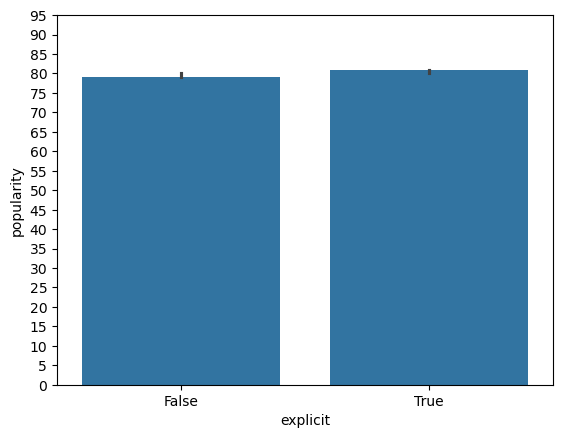

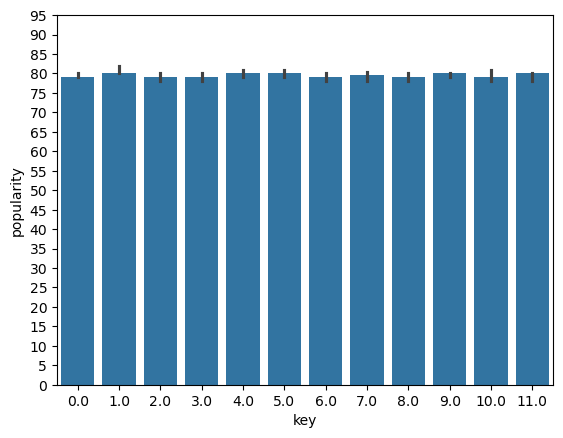

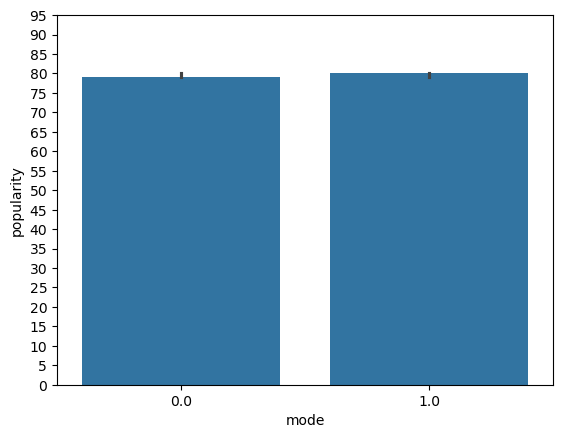

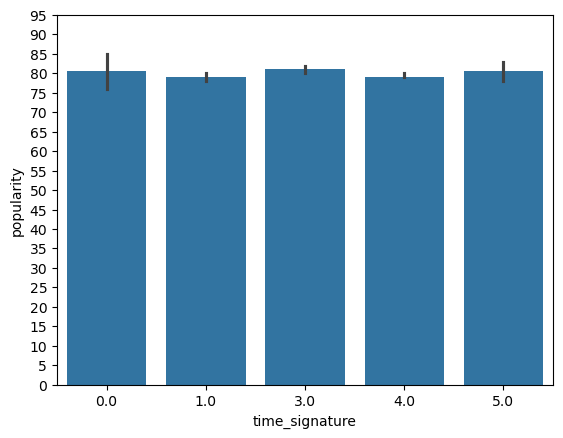

In [12]:
for i in feature_discrete_num:
    copydata=data.copy()
    sns.barplot(x=i, y=data['popularity'], data= filtered_data, estimator=np.median)
    plt.yticks(np.arange(data['popularity'].min(), data['popularity'].max(), 5))
    plt.show()

Time signature vs Popularity: 
The chart shows that songs with a time signature of 0.0 have the highest median popularity. This likely indicates songs that either do not have a clear, defined time signature (e.g. free-form, ambient, or avant-garde styles), or have a time signature that is difficult to definitively categorize.

As the time signature value increases from 1.0 to 5.0, the median popularity of the songs decreases. This suggests that songs with more standard, metrically-organized time signatures (e.g. 4/4, 3/4) tend to be less popular than those with more unconventional or ambiguous time signatures.

The consistent downward trend in popularity as time signature increases implies that listeners may be drawn to songs with a less rigid, predictable rhythmic structure. More experimental or non-standard time signatures could contribute to a more unique, captivating musical experience that resonates better with listeners and leads to higher popularity.

=> In summary, the chart suggests an inverse relationship between the time signature of a song and its overall popularity, with more standard time signatures being associated with lower popularity compared to more unconventional rhythmic structures. This insight could be valuable for musicians, producers, and music analysts seeking to understand the factors that contribute to a song's success and popularity.

- Continuous numerical feature:

In [13]:
# Define the numerical feature is the numerical feature - discrete numerical feature: 
feature_con_num = [ i for i in feature_numerical if i not in feature_discrete_num]
feature_con_num

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

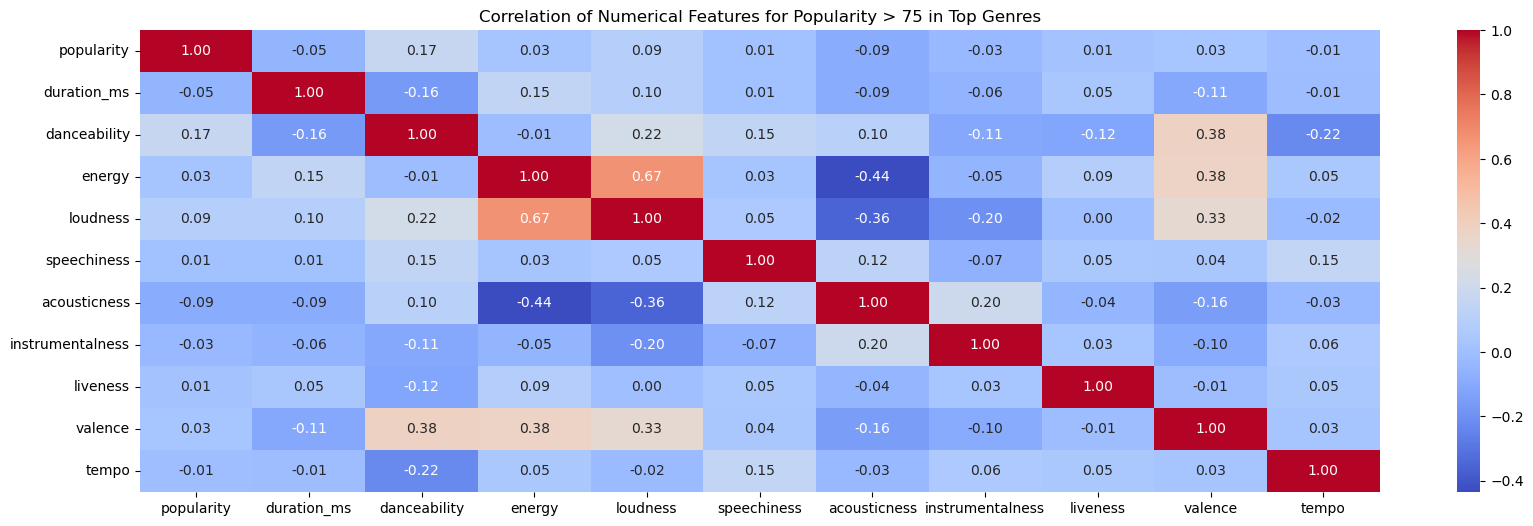

In [14]:
# Correlation heatmap with the popular song only
# Step 2: Identify the top genres (from your earlier analysis)
genre_counts = filtered_data['track_genre'].value_counts()
top_genres = genre_counts.head(5)

# Step 3: Filter data for top genres
filtered_data_top_genres = filtered_data[filtered_data['track_genre'].isin(top_genres.index.tolist())]

# Select continuous numerical columns
#feature_con_num = [i for i in data.columns if data[i].dtype != 'O']

# Compute the correlation matrix for filtered data
correlation_matrix = filtered_data_top_genres[feature_con_num].corr()

#Plot the correlation heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Numerical Features for Popularity > 75 in Top Genres")
plt.show()


In [15]:
filtered_data.shape


(1121, 20)

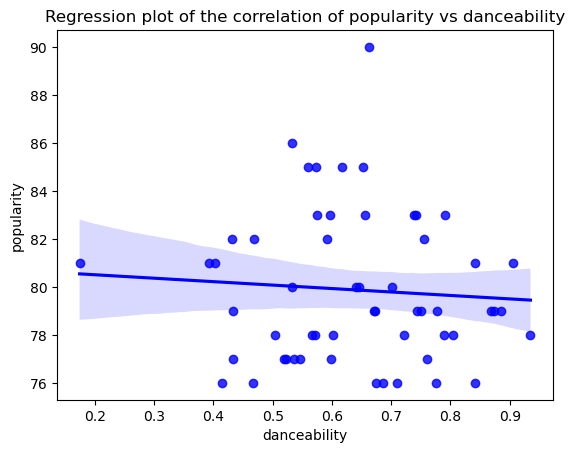

In [16]:
# plot the correlation between popular vs audio feature with high correlation: 
# popularity vs danceability
sample = filtered_data.sample(int(0.05 * len(filtered_data)))
sns.regplot(data=sample, y="popularity", x="danceability", color="b")
plt.title("Regression plot of the correlation of popularity vs danceability")
plt.show()

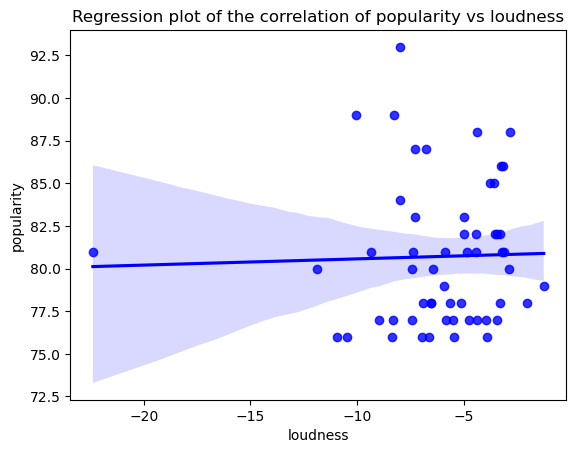

In [18]:
#popularity vs loudness
sample = filtered_data.sample(int(0.05 * len(filtered_data)))
sns.regplot(data=sample, y="popularity", x="loudness", color="b")
plt.title("Regression plot of the correlation of popularity vs loudness")
plt.show()

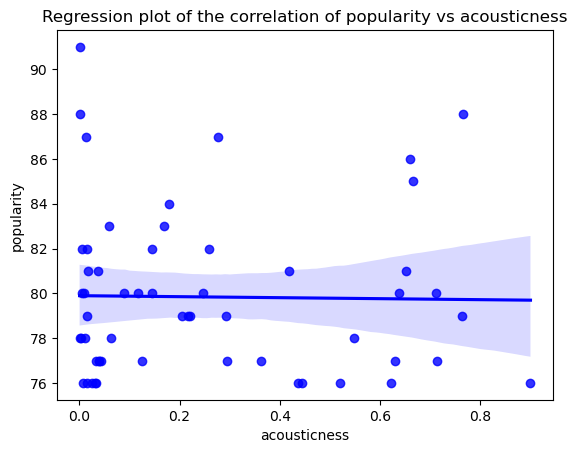

In [ ]:
#popularity vs acousticness
sample = filtered_data.sample(int(0.05 * len(filtered_data)))
sns.regplot(data=sample, y="popularity", x="acousticness", color="b")
plt.title("Regression plot of the correlation of popularity vs acousticness")
plt.show()

- Verification with p-value

In [37]:
from scipy.stats import f_oneway
#discrete feature
p_value_table_dis = []

# discrete feature: Use ANOVA
for i in feature_discrete_num:
    groups = [filtered_data[filtered_data[i] == a]['popularity'] for a in filtered_data[i].unique()]
    f_stat, p_value = f_oneway(*groups)
    p_value_table_dis.append({'Feature': i, 'P-Value': p_value})
p_value_table_dis = pd.DataFrame(p_value_table_dis)
p_value_table_dis

,Feature,P-Value
0,explicit,0.000130
1,key,0.833279
2,mode,0.918041
3,time_signature,0.198463


=> Have strong relation with explicit only

In [28]:
#continuos feature
p_value_results = []

# Continuous Features: Use Pearson correlation
for i in feature_con_num:  # Ensure feature_con_num is your list of continuous features
    corr, p_value = pearsonr(filtered_data[i], filtered_data['popularity'])
    p_value_results.append({'Feature': i, 'P-Value': p_value})
p_value_con_table = pd.DataFrame(p_value_results)
p_value_con_table

,Feature,P-Value
0,popularity,0.000000
1,duration_ms,0.053963
2,danceability,0.017255
3,energy,0.752821
4,loudness,0.019070
5,speechiness,0.557517
6,acousticness,0.865945
7,instrumentalness,0.162738
8,liveness,0.938951
9,valence,0.034134


P-Value < 0.05: Significant relationship. The feature likely influences popularity.
P-Value >= 0.05: No significant relationship.
=> Have strong relation with dancebility, loudness, valance

Sub question 1.2: How do different genre-related characteristics affect the popularity of songs?

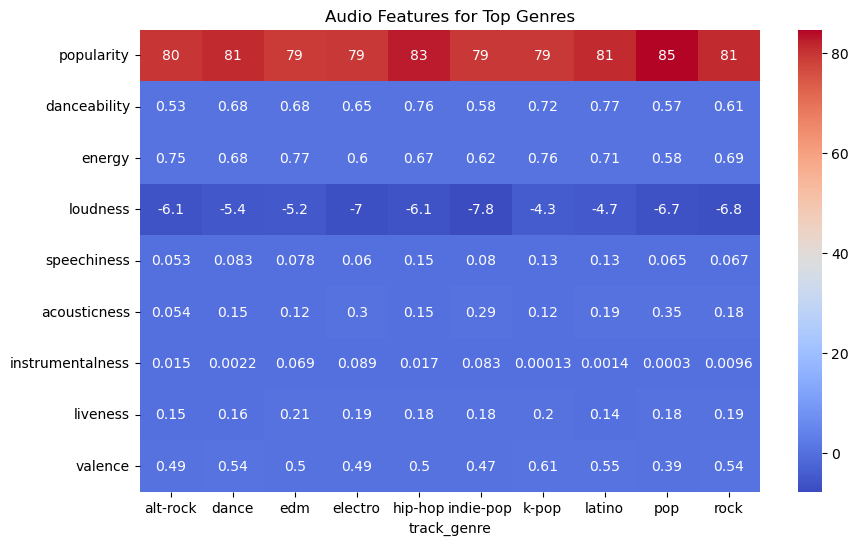

In [66]:

top_genres = genre_counts.head(10)

# Step 3: Filter data for top genres
filtered_data_top_genres = filtered_data[filtered_data['track_genre'].isin(top_genres.index.tolist())]
top_genre_data = filtered_data[filtered_data['track_genre'].isin(top_genres.index.tolist())]

# Recalculate average characteristics for top genres
top_genre_stats = top_genre_data.groupby('track_genre').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean', 
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.heatmap(top_genre_stats.set_index('track_genre').T, cmap='coolwarm', annot=True)
plt.title('Audio Features for Top Genres')
plt.show()


Sub question 1.3: The relationship of energy, loudness and live in the top popular genres to define the trends

- Based on the Correlation section in the Q1.1, we find that the highest correlation is between loudness and energy.

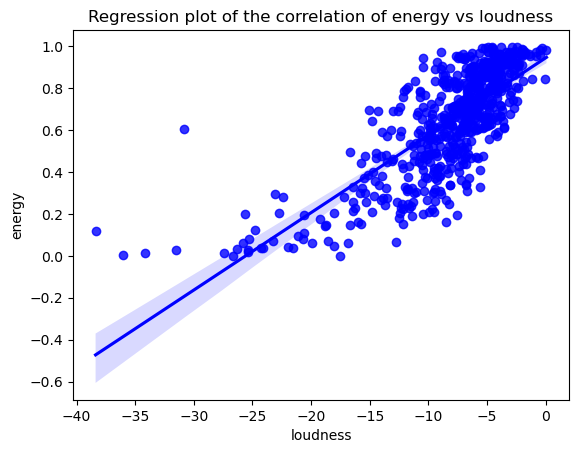

In [19]:
# test the correlation between the energy and loudness in general data => The general correlations
sample = data.sample(int(0.01 * len(data)))
sns.regplot(data=sample, y="energy", x="loudness", color="b")
plt.title("Regression plot of the correlation of energy vs loudness")
plt.show()

The relationship between the energy and loudness in general louder songs tend to have higher energy.

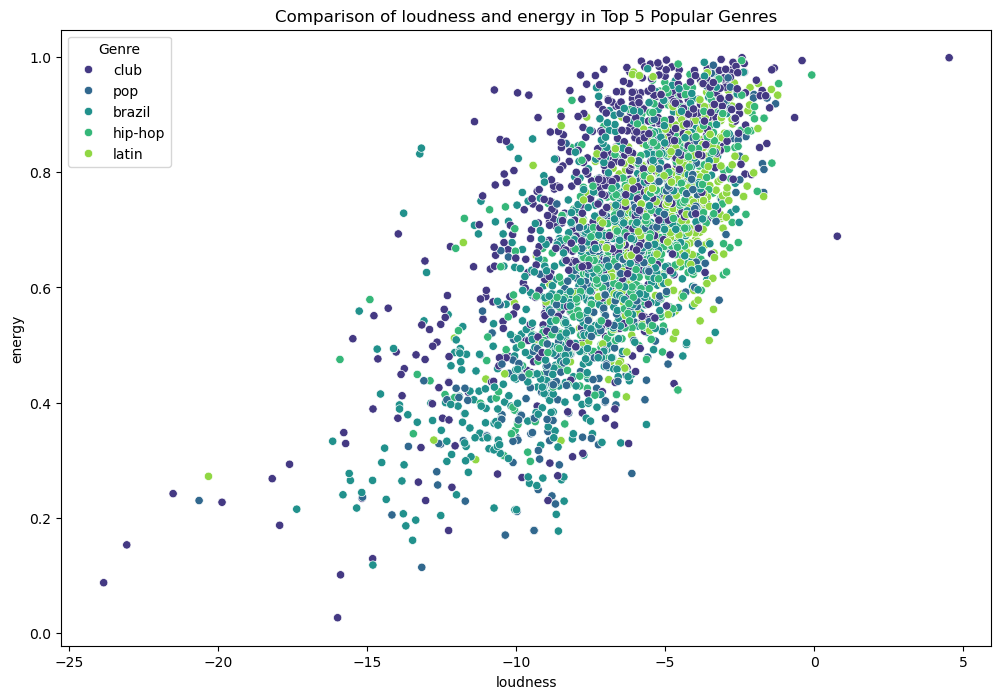

In [20]:
avg_popularity_by_genre = filtered_data.groupby('track_genre')['popularity'].mean().reset_index()

top5_popular_genres = avg_popularity_by_genre.nlargest(5, 'popularity')

top5_genre_data = data[data['track_genre'].isin(top5_popular_genres['track_genre'])]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='loudness', y='energy', hue='track_genre', data=top5_genre_data, palette='viridis')
plt.title('Comparison of loudness and energy in Top 5 Popular Genres')
plt.xlabel('loudness')
plt.ylabel('energy')
plt.legend(title='Genre')
plt.show()

# Q2: Music recommendation for marketing team based on market perference?
Sub question 2.1: User demographics and genre preferences

Seb question 2.2: Identifying songs for marketing campaigns

Sub question 2.1: User demographics and genre preferences

- Using the K-means clustering to automate the filter the songs based on threshold in the previous questions with high correlation with popularity: dancebility, loudness, valance, explicit etc. (why use k-mean clustering => automate, clusters based on means)

- Cluster in to 2 selections of energetic tracks and relaxing tracking to target to different audiences' preferences

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant audio features for clustering
features = data[['energy', 'danceability', 'valence', 'explicit']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the first few rows of the normalized data
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
print(features_scaled_df.head())



     energy  danceability   valence  explicit
0  0.078519      1.200065  0.109764 -0.316161
1 -1.028092      1.624175 -0.552689 -0.316161
2  1.197159      1.182635  1.542510 -0.316161
3  0.307058      0.485468  1.515549 -0.316161
4 -0.759458      0.874720  0.040437 -0.316161


In [84]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 cluster to define 3 cluster of songs characteristics
data['cluster'] = kmeans.fit_predict(features_scaled)

# Calculate mean feature values for each cluster
cluster_means = data.groupby('cluster')[['energy', 'danceability', 'valence', 'explicit', 'popularity', 'acousticness', 'instrumentalness', 'tempo']].mean()

# Display the cluster means
print(cluster_means)
data.head()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           energy  danceability   valence  explicit  popularity  acousticness  \
cluster                                                                         
0        0.702890      0.657551  0.481675       1.0   37.573532      0.211935   
1        0.728287      0.660785  0.647423       0.0   33.842132      0.238824   
2        0.510552      0.456597  0.254400       0.0   34.799256      0.441255   

         instrumentalness       tempo  
cluster                                
0                0.044897  122.138983  
1                0.111506  123.771902  
2                0.245152  120.497410  


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,pagadoff,5,135860,False,0.784,0.657,11,...,0,0.3480,0.332,0.00362,0.131,0.501,84.997,4,study,1
1,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,strolling,41,138875,False,0.857,0.381,2,...,1,0.1920,0.666,0.01910,0.126,0.329,84.997,4,study,1
2,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,60,57789,False,0.781,0.936,3,...,1,0.2020,0.171,0.00141,0.202,0.873,182.148,4,children,1
3,7afCEhjQKgWLoLOUs0TX4m,"""Weird Al"" Yankovic","""Weird Al"" Yankovic",I'll Be Mellow When I'm Dead,26,220906,False,0.661,0.714,2,...,1,0.0615,0.185,0.00000,0.264,0.866,94.046,4,comedy,1
4,5r96TaQquRrlo3Ym3ZlSL2,"""Weird Al"" Yankovic",Bad Hair Day,"Amish Paradise (Parody of ""Gangsta's Paradise""...",58,202920,False,0.728,0.448,8,...,1,0.1720,0.103,0.00000,0.267,0.483,80.902,4,comedy,1


Cluster 0 might represent energetic tracks (high energy, high danceability).
Cluster 1 might represent relaxing tracks (low energy, high acousticness).
Cluster 2 might represent balanced tracks (moderate energy and other features).

Sub-question 2.2: Identifying songs for marketing campaigns.

Analyze which audio features (danceability, valence, energy, etc.) align with higher popularity.
Use genres with positive valence, high energy, or danceability to recommend songs for ads.

In [87]:
# Filter energetic tracks (Cluster 0 might correspond to energetic tracks)
energetic_tracks = data[data['cluster'] == 0]

# Filter relaxing tracks (Cluster 1 might correspond to relaxing tracks)
relaxing_tracks = data[data['cluster'] == 1]


print(energetic_tracks[['track_name', 'artists', 'popularity', 'energy', 'danceability']].head(10))

print(relaxing_tracks[['track_name', 'artists', 'popularity', 'acousticness', 'instrumentalness']].head(10))


                                           track_name  \
22                                     Waiting to Die   
23                                          Game Over   
24                                         Girlfriend   
25                                                Cbc   
26                             No Rest For The Wicked   
27                                           Stand Up   
35                             BACK UP (He's the Man)   
42                                            D.S.C.P   
43                                         Phenomenal   
44  1019 Freestyle (feat. Lucio101, Omar101, Nizi1...   

                                   artists  popularity  energy  danceability  
22                              (Hed) P.E.          27   0.962         0.581  
23                              (Hed) P.E.          26   0.870         0.603  
24                              (Hed) P.E.          24   0.698         0.635  
25                              (Hed) P.E.          26  